# Toolbox

In [1]:
from Tools.DataTools import onehotcoding_string, onehotcoding, clean_dataset,load_dataset, ReSamplingData, path_to_tensor, paths_to_tensor
from Tools.PlotTools import Plot_disease_count, Plot_image_check, plot_model_history, Classification_ROC_Report, Plot_predict
from Tools.ModelTools import model_training, HistoryTraining_Save
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import sys
# print(sys.version, sys.platform, sys.executable)
# from Tools.tqdm import tqdm
from tqdm import tqdm
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import os
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from keras.preprocessing import image                  
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from keras import backend as K 
K.tensorflow_backend._get_available_gpus() 


Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15738869252043701017
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15126794011889943663
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17070651244883344120
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6291264790248286804
physical_device_desc: "device: XLA_GPU device"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

In [ ]:

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(350, 350)))
    # convert PIL.Image.Image type to 3D tensor with shape (350, 350, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 350, 350, 3) and return 4D tensor
    x = np.expand_dims(x, axis=0)
    # convert 
    x = preprocess_input(x)
    return x

def paths_to_tensor(img_paths):
    # List files for loading and reshaping
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)] 
    return np.vstack(list_of_tensors)



In [3]:
# Model name for model saving 
Model_Name = 'saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise.hdf5'

# Loading data

In [4]:
#------------------------
# Get files path and target label for classification
X_train_init, Y_train_init, Y_names_train = load_dataset('OCT2017/train')
X_test_init, Y_test_init, Y_names_test = load_dataset('OCT2017/test')
X_val, Y_val, Y_names_val = load_dataset('OCT2017/val')
# Split training dataset
X_train, X_train1, Y_train, Y_train1 = train_test_split(X_train_init, Y_train_init, test_size=0.95) # Re-comment 
X_test, Y_test = X_test_init, Y_test_init

print('X_train : ',X_train.shape, 'Cases')
print('X_test : ',X_test.shape, 'Cases')
print('X_val : ',X_val.shape, 'Cases')
print('Y_train : ',Y_train.shape, 'Cases')
print('Y_test : ',Y_test.shape, 'Cases')
print('Y_val : ',Y_val.shape, 'Cases')

Read Folder :  OCT2017/train
Read Folder :  OCT2017/test
Read Folder :  OCT2017/val
X_train :  (4174,) Cases
X_test :  (968,) Cases
X_val :  (32,) Cases
Y_train :  (4174,) Cases
Y_test :  (968,) Cases
Y_val :  (32,) Cases


# Resampling

In [5]:
#------------------------
#Resampling check
X_train_ROS, Y_train_ROS = ReSamplingData(X_train,Y_train,'ROS')
X_test_ROS, Y_test_ROS = ReSamplingData(X_test,Y_test,'ROS')
print('X_train_ROS : ',X_train_ROS.shape, 'Cases')
print('Y_train_ROS : ',Y_train_ROS.shape, 'Cases')
#
X_train_RUS, Y_train_RUS = ReSamplingData(X_train,Y_train,'RUS')
X_test_RUS, Y_test_RUS = ReSamplingData(X_test,Y_test,'RUS')
print('X_train_RUS : ',X_train_RUS.shape, 'Cases')
print('Y_train_RUS : ',Y_train_RUS.shape, 'Cases')
#
#Resamping dataset for model training
X_train_Resample, Y_train_Resample = ReSamplingData(X_train,Y_train,'RUS')
X_test_Resample, Y_test_Resample = ReSamplingData(X_test,Y_test,'RUS')
#

X_train_ROS :  (7492,) Cases
Y_train_ROS :  (7492,) Cases
X_train_RUS :  (1636,) Cases
Y_train_RUS :  (1636,) Cases


# Plot dataset

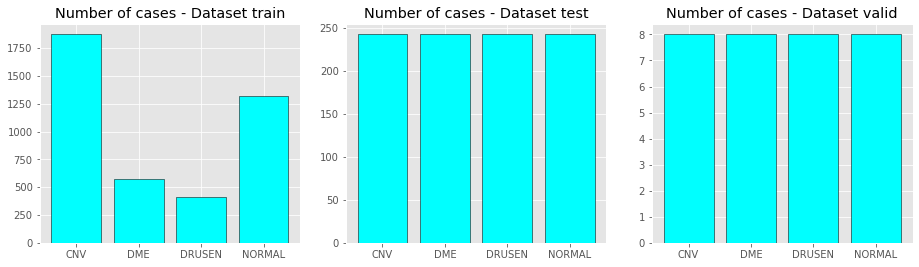

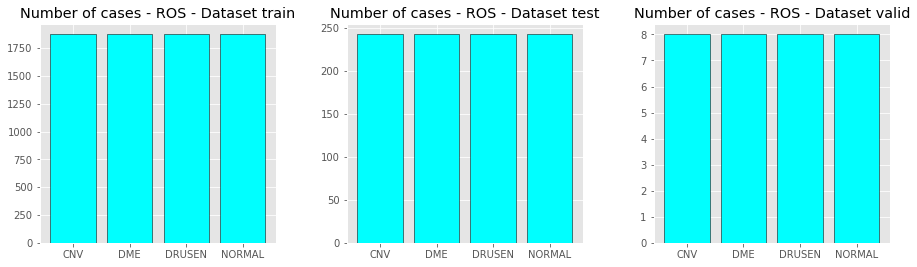

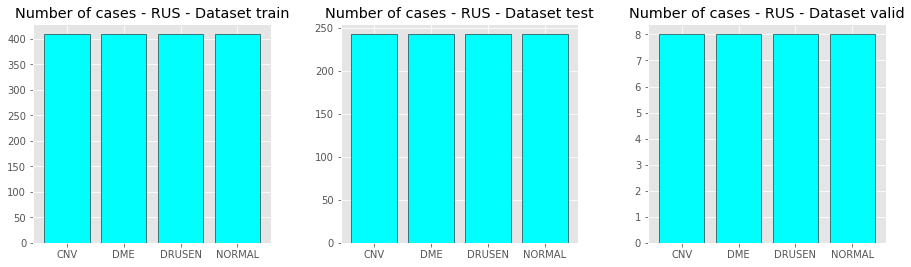

In [6]:
#------------------------
# PLOT NUMBER OF DISEASE PER DATASET
Plot_disease_count(Y_train,Y_test,Y_val,Y_names_train,['Number of cases - Dataset '])
Plot_disease_count(Y_train_ROS,Y_test_ROS,Y_val,Y_names_train,['Number of cases - ROS - Dataset '])
Plot_disease_count(Y_train_RUS,Y_test_RUS,Y_val,Y_names_train,['Number of cases - RUS - Dataset '])


# Convert paths to tensor

In [7]:
#------------------------
# Convert image data to tensorflow format
X_train_transform = paths_to_tensor(X_train_Resample).astype('float32')
Y_train_transform = onehotcoding(Y_train_Resample)
X_test_transform = paths_to_tensor(X_test_Resample).astype('float32')
Y_test_transform = onehotcoding(Y_test_Resample)
X_valid = paths_to_tensor(X_val).astype('float32')
Y_valid = onehotcoding(Y_val)

100%|██████████| 32/32 [00:00<00:00, 186.98it/s]


# Image Data Generator

In [8]:
# create and configure augmented image generator
# Training dataset
datagen_train = ImageDataGenerator(
        featurewise_center=True, 
        featurewise_std_normalization=True,
#         rescale=1/255.,
        rotation_range=20.,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 
datagen_train.fit(X_train_transform)
print('datagen_train fit Done')
# Testing dataset
datagen_test = ImageDataGenerator(
#         rescale=1/255.)
        featurewise_center=True, 
        featurewise_std_normalization=True)
datagen_test.fit(X_test_transform)
print('datagen_test fit Done')


datagen_train fit Done
datagen_test fit Done


# Plot image augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

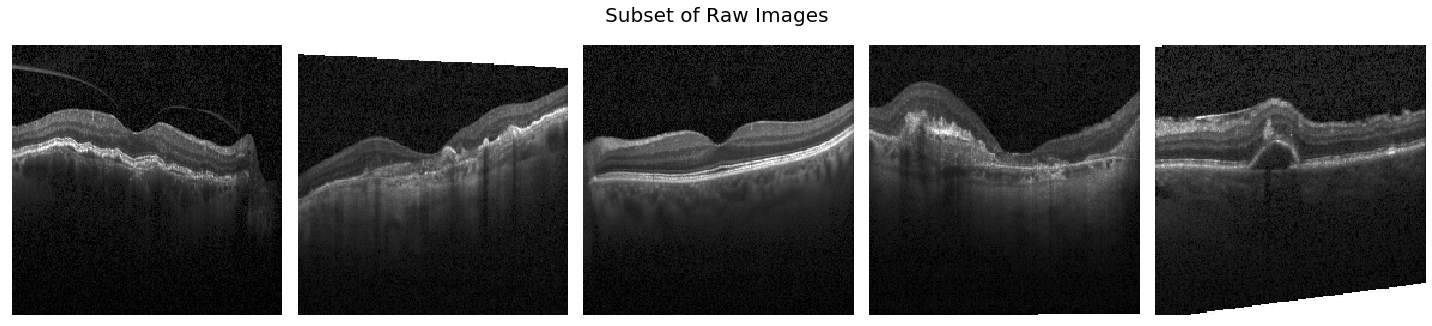

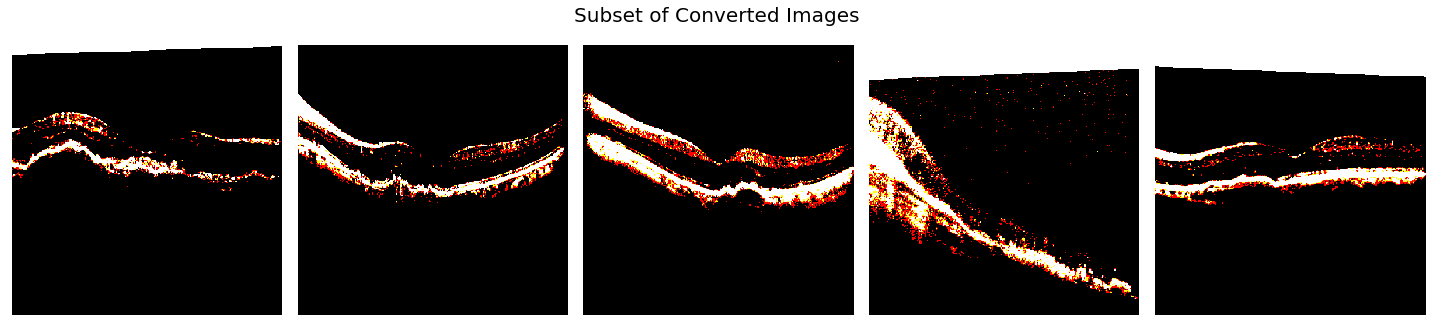

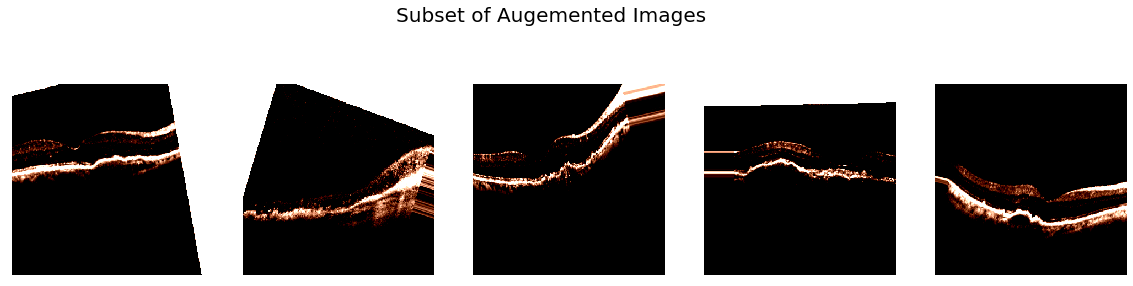

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

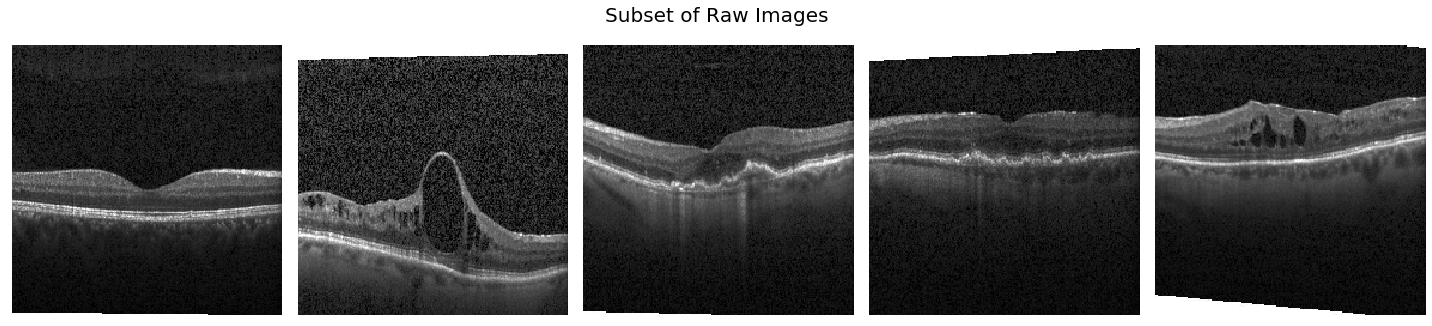

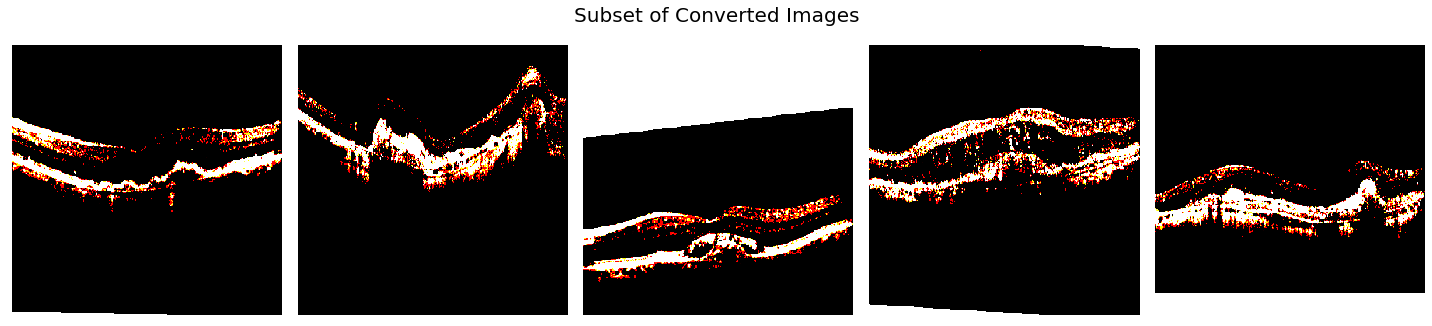

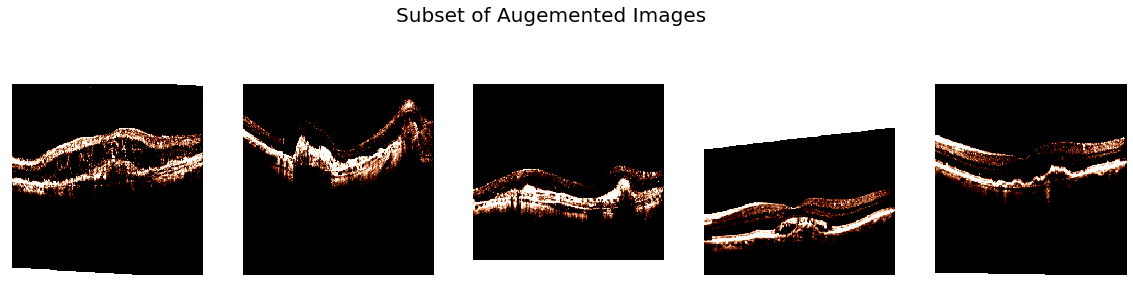

In [10]:
#------------------------
# PLOT AUGMENTATION
Plot_image_check(X_train_transform,X_train,datagen_train)
Plot_image_check(X_test_transform,X_test,datagen_test)

# SQUEEZENET

## Build model

In [11]:

from keras_squeezenet import SqueezeNet
from keras.engine import InputLayer
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Conv2D, MaxPooling2D, Convolution2D, AveragePooling2D, Activation, Concatenate
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Flatten, Dense, merge
import keras
from keras.callbacks import ModelCheckpoint
import pandas as pd
from keras.applications import VGG16
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, warnings
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils 

def fire_module(x, fire_id, squeeze=16, expand=64):
    """
    Fire Module
    Input data : 
        x          -> output of the previous layer
        fire_id    -> fire identification
        squeeze    -> number of filters in squeeze layer
        expand     -> number of filters in expand layer
        use_bypass -> By pass activation
        
    Output data : 
        x      -> output of the model with fire module added
    """
    sq1x1 = "squeeze1x1"
    exp1x1 = "expand1x1"
    exp3x3 = "expand3x3"
    relu = "relu_"

    s_id = 'fire' + str(fire_id) + '/'

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3
    
    x = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1, kernel_initializer='he_normal')(x)
    x = Activation('relu', name=s_id + relu + sq1x1)(x)

    left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1, kernel_initializer='he_normal')(x)
    left = Activation('relu', name=s_id + relu + exp1x1)(left)

    right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3, kernel_initializer='he_normal')(x)
    right = Activation('relu', name=s_id + relu + exp3x3)(right)

    x = concatenate([left, right], axis=channel_axis, name=s_id + 'concat')
    return x

def SqueezeNet_InitRandomWeight_Model(Model_Name):
    """
    SqueezeNet model from scratch with kernel initializer : he_normal. 
    Input data : 
        Model_Name -> Name of the model for saving

    Output data :
        callbacks  -> Training parameters settings
        model      -> SqueezeNet model built
    """
    #------------------------------------
    # Load squeezenet model 
    print('-----------------------------------------------------------')
    print('------------------Import SqueezeNet Model------------------')
    print('-----------------------------------------------------------','\n')
    # def SqueezeNet(nb_classes, inputs=(height, width, 3)): # 3 is the number of input channels in this case
    nb_classes = 4
    input_shape = _obtain_input_shape((350, 350, 3),
                                      default_size=350,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=True)
    input_tensor=None
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = Convolution2D(64, (3, 3), strides=(2, 2), padding='valid', name='conv1', kernel_initializer='he_normal')(img_input)
    x = Activation('relu', name='relu_conv1')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)

    x = fire_module(x, fire_id=2, squeeze=16, expand=96)
    x = fire_module(x, fire_id=3, squeeze=16, expand=96)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3')(x)

    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool5')(x)

    x = fire_module(x, fire_id=6, squeeze=48, expand=192)
    x = fire_module(x, fire_id=7, squeeze=48, expand=192)
    x = fire_module(x, fire_id=8, squeeze=64, expand=256)
    x = fire_module(x, fire_id=9, squeeze=64, expand=256)
    x = Dropout(0.5, name='drop9')(x)

    x = Convolution2D(nb_classes, (1, 1), padding='valid', name='conv10', kernel_initializer='he_normal')(x)
    x = Activation('relu', name='relu_conv10')(x)
    x = GlobalAveragePooling2D()(x)
    x = Activation('softmax', name='loss')(x)

    inputs = img_input

    model = Model(inputs, x, name='squeezenet')
    
    for (i,layer) in enumerate(model.layers):
        print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    #
    #------------------------------------
    # Optimizer
    optim=keras.optimizers.Adam(lr = 0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print('----------Compile Done----------')
    #------------------------------------
    # EarlyStop
    EarlyStop_callbacks = keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                min_delta=1e-4,
    #                             baseline=0.4,
                            patience = 10,
                            verbose = 1,
                            restore_best_weights = True)
    #------------------------------------
    #ReduceLROnPlateau
    ReduceLROnPlateau=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=4,
                                   verbose=1,
                                   epsilon=1e-4,
                                   mode='min')
    #------------------------------------
    # Checkpointer
    checkpointer = ModelCheckpoint(filepath=Model_Name,
                                monitor="val_loss",
                                mode="min", #auto
                                save_best_only = True,
                                verbose=1)

    callbacks = [checkpointer, EarlyStop_callbacks, ReduceLROnPlateau]   
    # 
    return callbacks, model

## Training

In [12]:
# Check GPU available
from keras import backend as K 
K.tensorflow_backend._get_available_gpus() 

['/job:localhost/replica:0/task:0/device:GPU:0']

In [13]:
# Load model
callbacks, model = SqueezeNet_InitRandomWeight_Model(Model_Name)
model.summary()

-----------------------------------------------------------
------------------Import SqueezeNet Model------------------
----------------------------------------------------------- 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
0 InputLayer False
1 Conv2D True
2 Activation True
3 MaxPooling2D True
4 Conv2D True
5 Activation True
6 Conv2D True
7 Conv2D True
8 Activation True
9 Activation True
10 Concatenate True
11 Conv2D True
12 Activation True
13 Conv2D True
14 Conv2D True
15 Activation True
16 Activation True
17 Concatenate True
18 MaxPooling2D True
19 Conv2D True
20 Activation True
21 Conv2D True
22 Conv2D True
23 Activation True
24 Activation True
25 Concatenate True
26 Conv2D True
27 Activation True
28 Conv2D True
29 Conv2D True
30 Activation True
31 Activation True
32 Concatenate True
33 MaxPooling2D True
34 Conv2D True
35 Activation True
36

/home/ubuntu/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [14]:
#------------------------
# Training model
batch_size = 32
epochs = 500
history = model_training(model, callbacks, batch_size, epochs, datagen_train, datagen_test, X_train_transform, Y_train_transform, X_test_transform, Y_test_transform, Model_Name)


Instructions for updating:
Use tf.cast instead.
Epoch 1/500
51/51 [==============================] - 45s 877ms/step - loss: 1.4170 - acc: 0.2335 - val_loss: 1.3862 - val_acc: 0.2510

Epoch 00001: val_loss improved from inf to 1.38620, saving model to saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise.hdf5
Epoch 2/500
51/51 [==============================] - 40s 782ms/step - loss: 1.3868 - acc: 0.2567 - val_loss: 1.3862 - val_acc: 0.2425

Epoch 00002: val_loss improved from 1.38620 to 1.38616, saving model to saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise.hdf5
Epoch 3/500
51/51 [==============================] - 41s 810ms/step - loss: 1.3842 - acc: 0.2770 - val_loss: 1.3788 - val_acc: 0.3974

Epoch 00003: val_loss improved from 1.38616 to 1.37877, saving model to saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise.hdf5
Epoch 4/500
51/51 [==============================] - 41s 80


Epoch 00031: val_loss did not improve from 0.30035
Epoch 32/500
51/51 [==============================] - 42s 823ms/step - loss: 0.6105 - acc: 0.7714 - val_loss: 0.3090 - val_acc: 0.8958

Epoch 00032: val_loss did not improve from 0.30035
Epoch 33/500
51/51 [==============================] - 40s 793ms/step - loss: 0.6190 - acc: 0.7722 - val_loss: 0.3048 - val_acc: 0.8985

Epoch 00033: val_loss did not improve from 0.30035
Epoch 34/500
51/51 [==============================] - 42s 821ms/step - loss: 0.6132 - acc: 0.7659 - val_loss: 0.3075 - val_acc: 0.8953

Epoch 00034: val_loss did not improve from 0.30035

Epoch 00034: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 35/500
51/51 [==============================] - 41s 811ms/step - loss: 0.6143 - acc: 0.7757 - val_loss: 0.3003 - val_acc: 0.8996

Epoch 00035: val_loss improved from 0.30035 to 0.30030, saving model to saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise.hdf5
Epoch 

## Save and Plot Training History

Save :saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise.hdf5.json
Save :saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise.hdf5.csv


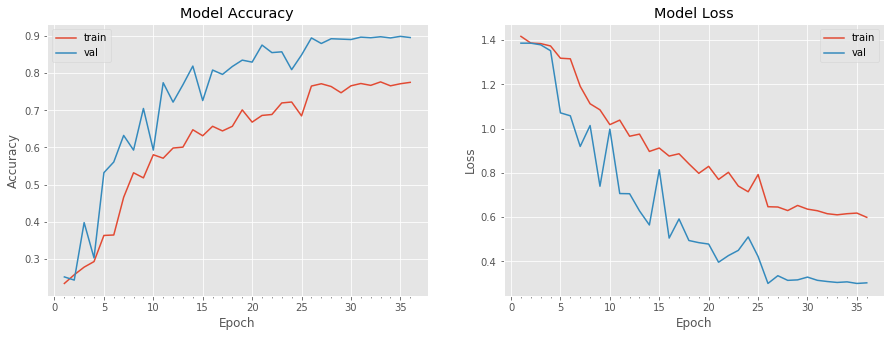

In [15]:
#------------------------
# Save model epoch history
HistoryTraining_Save(history, Model_Name)
#------------------------
# PLOT MODEL HISTORY
plot_model_history(history)

## Load model with best weight

In [16]:
#---------------
# Reload the weights that yielded the best validation accuracy
model.load_weights(Model_Name)

## Plot Classification - Confusion Matrix - ROC

Normalized confusion matrix
968/968 [==============================] - 3s 3ms/step


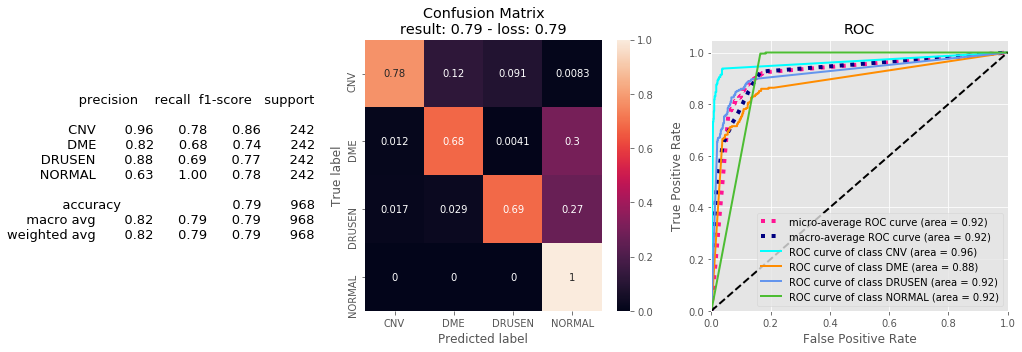

In [17]:
#------------------------
# PLOT MODEL HISTORY
Classification_ROC_Report(X_test_transform, Y_test_transform, model)

# Validation check

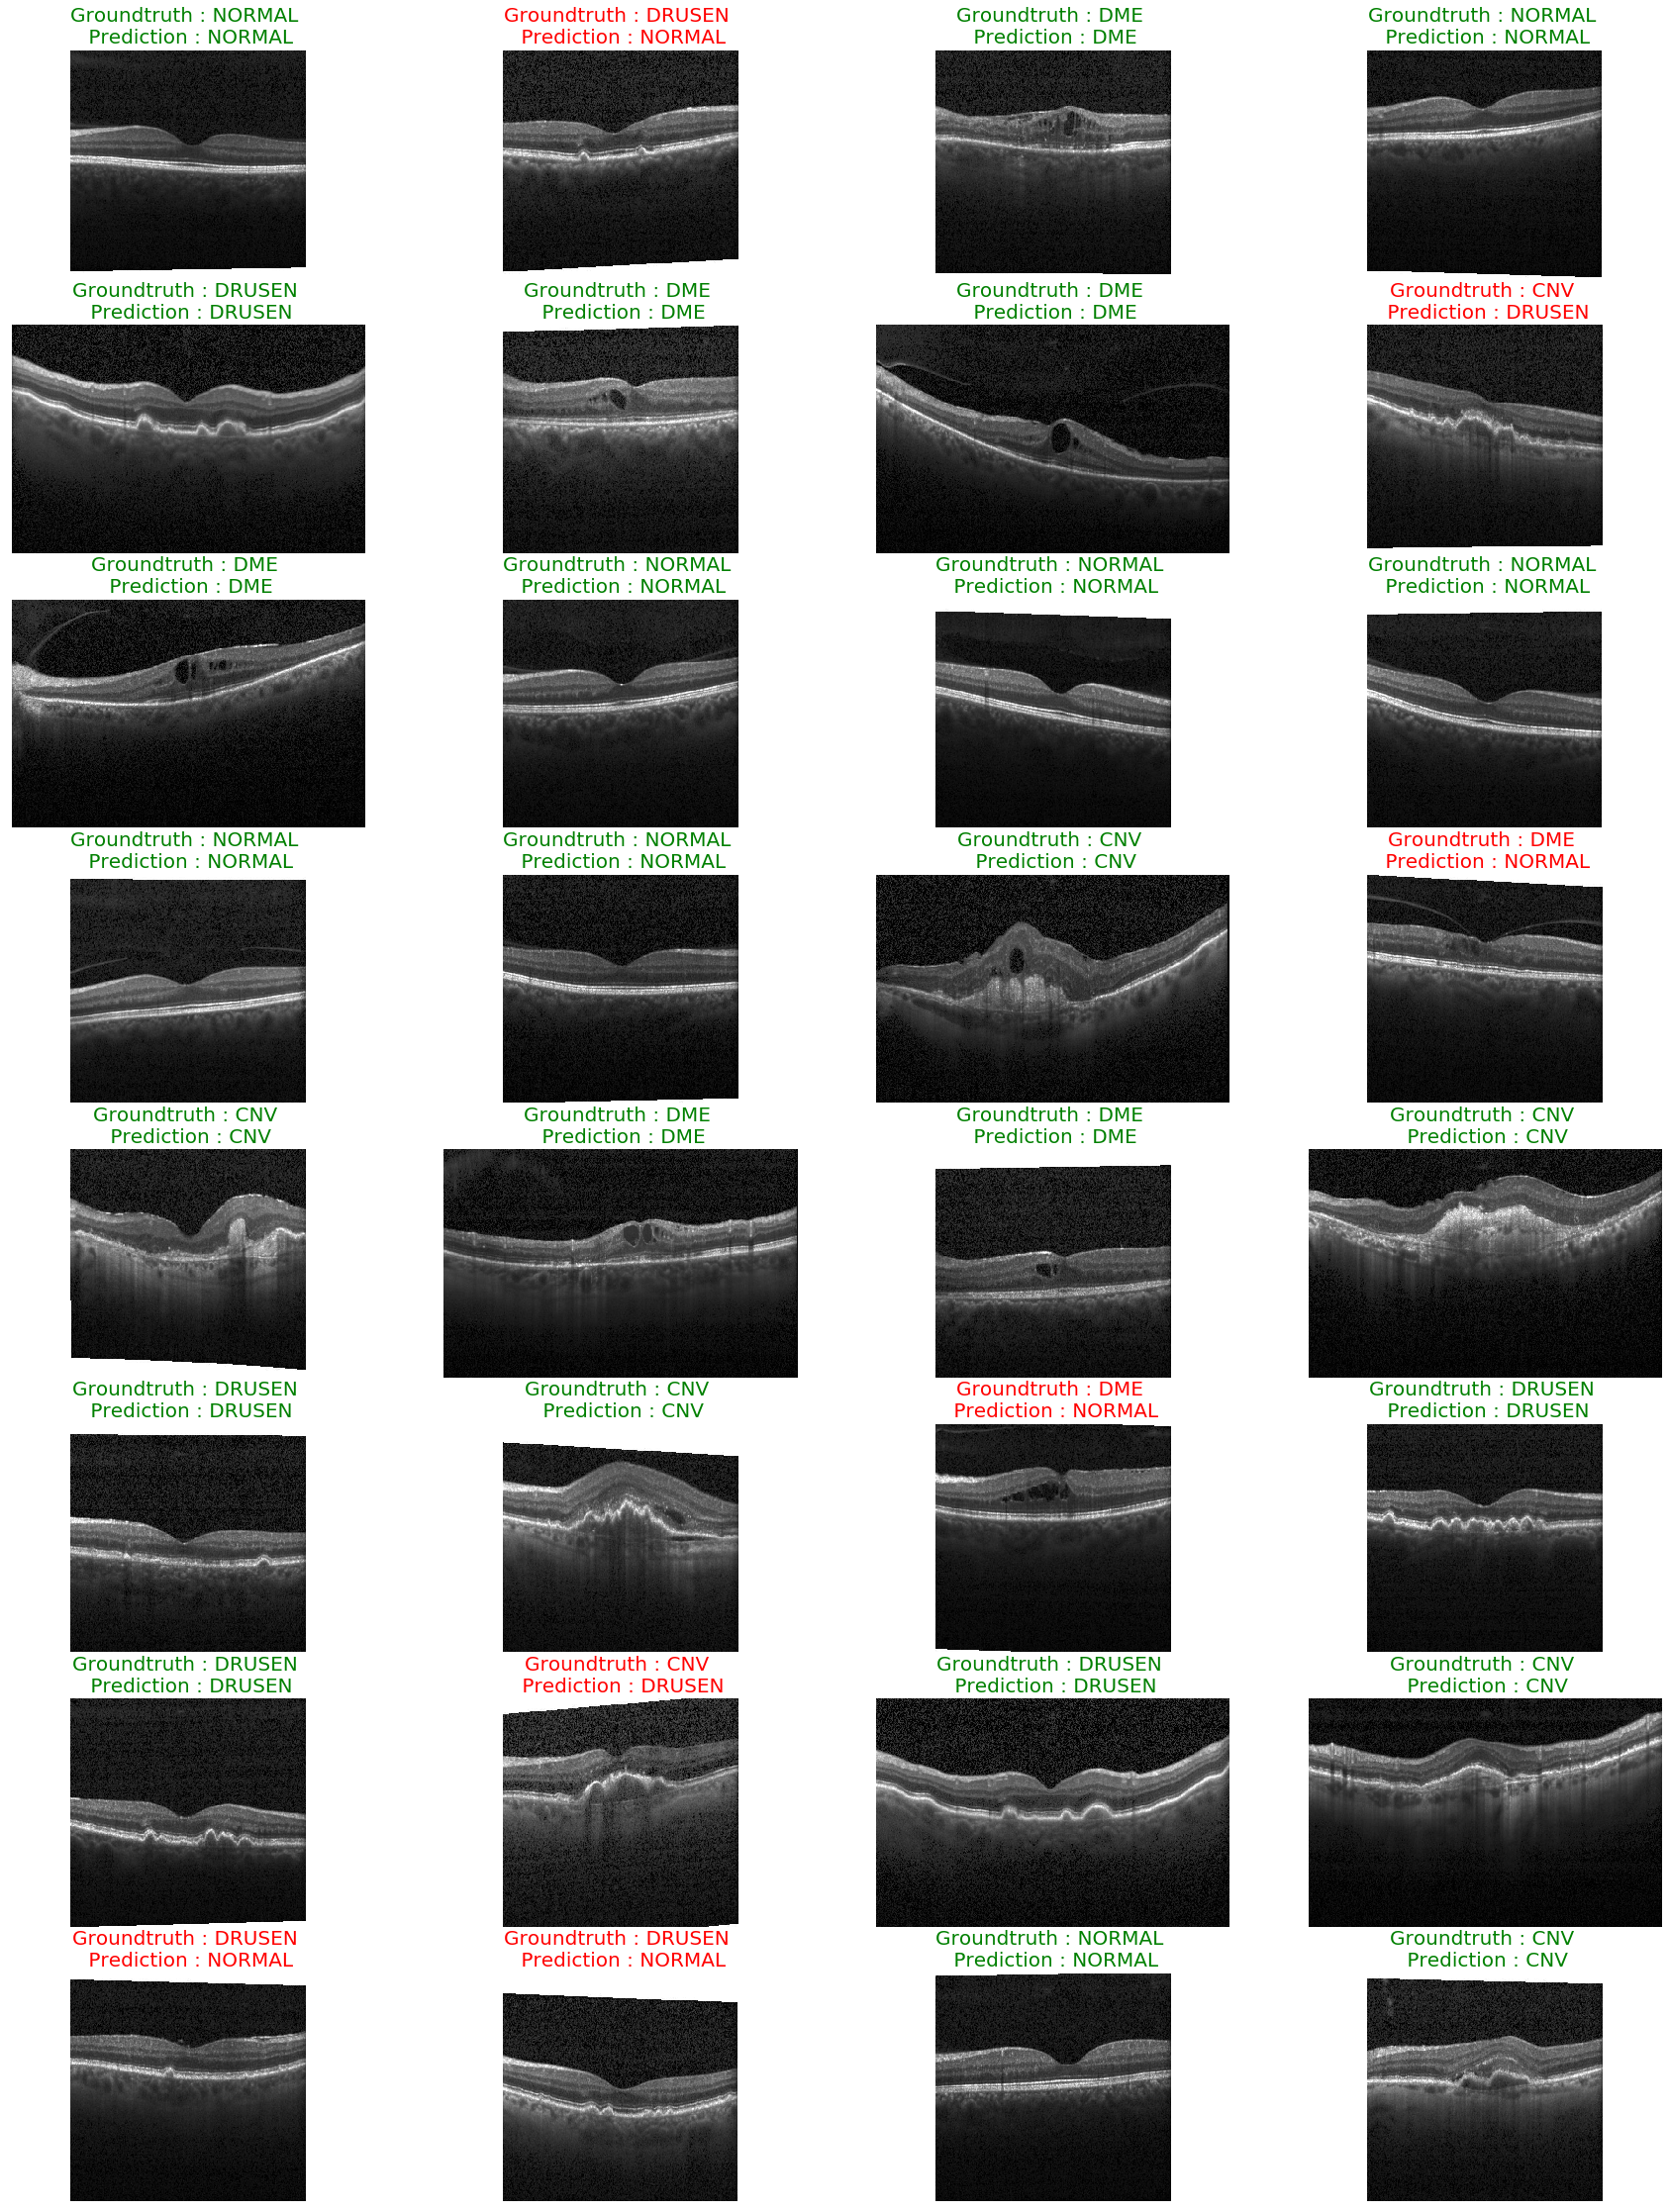

In [18]:
import matplotlib.pyplot as plt
from keras.preprocessing import image 

labels = {0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}
Y_pred_classes = np.argmax(model.predict(X_valid),axis = 1) 
Y_true = np.argmax(Y_valid,axis = 1)
    
fig = plt.figure(figsize=(30, 40))   
for i in range(X_valid.shape[0]):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.set_title("Groundtruth : {} \n Prediction : {}".format(labels[Y_true[i]],labels[Y_pred_classes[i]]), \
            color=("green" if Y_true[i] == Y_pred_classes[i] else "red"),fontsize=20) 
    img = image.load_img(X_val[i])
    ax.imshow(img)
plt.show()
